In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 14
mpl.rcParams['legend.fontsize']=12
mpl.rcParams['legend.title_fontsize']=14

In [2]:
with open('orf8ko_noAlpha_clusters_metadata.tsv', 'r') as f:
    df = pd.read_csv(f, sep='\t')

In [9]:
values,counts = np.unique(df.cluster,return_counts=True)
print(max(counts))

637


Text(0, 0.5, 'Number of clusters')

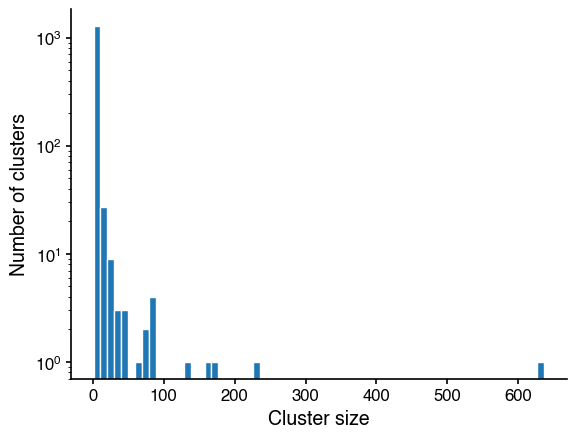

In [21]:
fig,ax = plt.subplots()
ax.hist(counts, bins=65,align='mid',ec='white')
ax.set_yscale('log')
ax.set_xlabel('Cluster size')
ax.set_ylabel('Number of clusters')

In [24]:
len(counts[counts>1])

408

In [27]:
len(counts[counts==1])

929

How many non-singleton clusters that contain at least one WA sequence?

In [51]:
inWA = []
for clust in values:
    divs = df.loc[df.cluster==clust,:]['division']
    if 'Washington' not in divs.values:
        #print(clust)
        pass
    else:
        inWA.append(clust)
        
inWA = np.asarray(inWA)
countsInWA = counts[inWA-1]

In [52]:
len(countsInWA)

1142

In [53]:
len(countsinWA[countsInWA>1])

385

In [54]:
len(countsInWA[countsInWA==1])

757

In [89]:
len(df.loc[(df.cluster.isin(inWA[countsInWA>1])) &(df.division=="Washington"),:])

3642

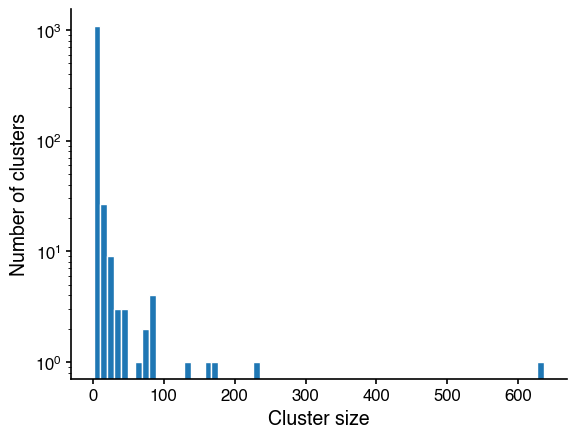

In [56]:
fig,ax = plt.subplots()
ax.hist(countsInWA, bins=65,align='mid',ec='white')
ax.set_yscale('log')
ax.set_xlabel('Cluster size')
ax.set_ylabel('Number of clusters')
fig.savefig("clusters_hist.pdf",bbox_inches='tight',dpi=300)


In [58]:
withUW = []
for clust in values:
    lab = df.loc[(df.cluster==clust) & (df.division=='Washington'),:]['submitting_lab']
    if 'UW Virology Lab' not in lab.values:
        #print(clust)
        pass
    else:
        withUW.append(clust)
        
withUW = np.asarray(withUW)
countsWithUW = counts[withUW-1]

In [60]:
len(countsWithUW)

280

In [86]:
len(countsWithUW[countsWithUW>10])

47

In [77]:
sequences = []
gisaid = []
for clust in withUW[countsWithUW>1]:
    filt = df.loc[(df.submitting_lab=='UW Virology Lab') & (df.cluster==clust),:]
    sequences.append(filt['strain'].values)
    gisaid.append(filt['gisaid_epi_isl'].values)

In [79]:
UWSamples = pd.DataFrame({'cluster': withUW[countsWithUW>1], 'clusterSize': countsWithUW[countsWithUW>1],'UWstrains': sequences, 'GISAIDid' : gisaid})

In [82]:
UWSamples.sort_values(by='clusterSize',ascending=False,inplace=True)

In [83]:
UWSamples.head()

,cluster,clusterSize,UWstrains,GISAIDid
60,789,637,"[USA/WA-CDC-UW22032723813/2022, USA/WA-CDC-UW2...","[EPI_ISL_12082611, EPI_ISL_8986511, EPI_ISL_93..."
72,858,227,"[USA/WA-UW-22051921070/2022, USA/WA-UW-2205239...","[EPI_ISL_13046826, EPI_ISL_13102941, EPI_ISL_1..."
152,1268,175,"[USA/WA-CDC-UW21122039065/2021, USA/WA-CDC-UW2...","[EPI_ISL_8354803, EPI_ISL_8131841, EPI_ISL_927..."
30,408,165,"[USA/WA-CDC-UW21051397198/2021, USA/WA-CDC-UW2...","[EPI_ISL_2332888, EPI_ISL_2432728, EPI_ISL_254..."
114,1102,132,"[USA/WA-UW-22010729281/2022, USA/WA-UW-2201106...","[EPI_ISL_9594922, EPI_ISL_9594916, EPI_ISL_959..."


In [84]:
with open('UWSamples_to_confirm.csv','w') as f:
    UWSamples.to_csv(f,index=False)